<a href="https://colab.research.google.com/github/adihend/data-analytics/blob/main/heart_failure_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJEKTIF KAGGLE (HEART FAILURE PREDICTION)

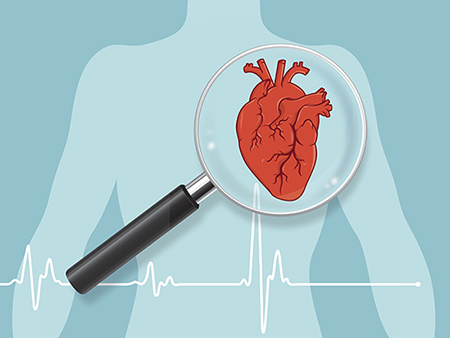

## Konteks
Penyakit kardiovaskular (CVDs) adalah penyebab utama kematian di seluruh dunia, menyebabkan diperkirakan 17,9 juta kematian setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Empat dari 5 kematian CVD disebabkan oleh serangan jantung dan stroke, dan sepertiga dari kematian ini terjadi secara prematur pada orang di bawah usia 70 tahun. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan dataset ini mengandung 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit jantung.

Orang dengan penyakit kardiovaskular atau yang berisiko tinggi kardiovaskular (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dini dan manajemen yang dapat sangat terbantu dengan model pembelajaran mesin.

## Informasi Atribut
- Age: usia pasien [tahun]
- Sex: jenis kelamin pasien [M: Male (Laki-laki), F: Female (Perempuan)]
- ChestPainType: jenis nyeri dada [TA: Typical Angina (Angina Tipikal), ATA: Atypical Angina (Angina Atipikal), NAP: Non-Anginal Pain (Nyeri Non-Angina), ASY: Asymptomatic (Asimtomatik)]
- RestingBP: tekanan darah saat istirahat [mm Hg]
- Cholesterol: kolesterol serum [mg/dl]
- FastingBS: gula darah puasa [1: jika FastingBS > 120 mg/dl, 0: jika sebaliknya]
- RestingECG: hasil elektrokardiogram saat istirahat [Normal: Normal, ST: memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan hipertrofi ventrikel kiri menurut kriteria Estes]
- MaxHR: detak jantung maksimum yang dicapai [Nilai numerik antara 60 dan 202]
- ExerciseAngina: angina yang diinduksi oleh latihan [Y: Yes (Ya), N: No (Tidak)]
- Oldpeak: oldpeak = ST [Nilai numerik diukur dalam depresi]
- ST_Slope: kemiringan segmen ST saat puncak latihan [Up: upsloping (menanjak), Flat: flat (datar), Down: downsloping (menurun)]
- HeartDisease: kelas keluaran [1: penyakit jantung, 0: Normal]

## Sumber
Dataset ini dibuat dengan menggabungkan berbagai dataset yang sudah tersedia secara independen tetapi belum pernah digabungkan sebelumnya. Dalam dataset ini, 5 dataset jantung digabungkan dengan 11 fitur umum yang membuatnya menjadi dataset penyakit jantung terbesar yang tersedia sejauh ini untuk tujuan penelitian. Lima dataset yang digunakan untuk kurasinya adalah:

- Cleveland: 303 observasi
- Hungarian: 294 observasi
- Switzerland: 123 observasi
- Long Beach VA: 200 observasi
- Stalog (Heart) Data Set: 270 observasi

Total: 1190 observasi
Duplikat: 272 observasi

Dataset final: 918 observasi

Sumber Data: [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Setiap dataset yang digunakan dapat ditemukan di bawah Indeks dataset penyakit jantung dari UCI Machine Learning Repository pada tautan berikut: [Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)


## Penghargaan
Pembuat:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:
- David W. Aha (aha '@' ics.uci.edu) (714) 856-8779


---

## Rumusan Masalah


1.   Bagaimana kemungkinan penyakit jantung yang terjadi?
2.   Bagaimana machine learning dapat membantu dalam memprediksi kemungkinan pengyakit jantung yang terjadi?

---



## Tujuan


1.   Menganalisis kemungkinan penyakit jantung;
2.   Memodelkan machine learning yang dapat membantu memprediksi kemungkinan penyakti jantung.

---


## Eksplorasi Data

In [ ]:
#@title Import File
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Import Library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
#@title Import Data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
data.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


---

## Visualisasi

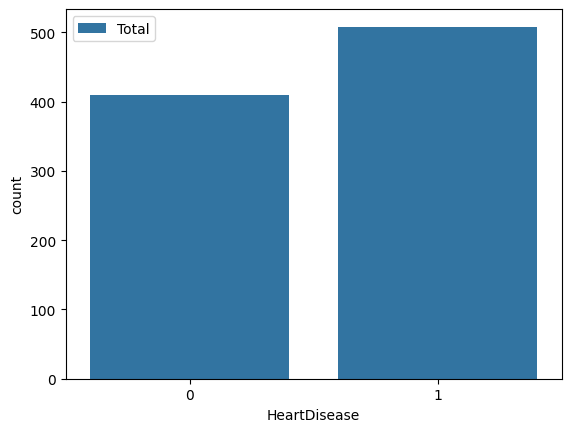

Punya penyakit jantung:  508
Tidak punya penyakit jantung :  410


In [ ]:
#@title Menghitung Sebaran Pengidap
y=data['HeartDisease']
plot_sb = sns.countplot(data,x=y, label='Total')
Rain, NotRain =y.value_counts()
plt.show()
print('Punya penyakit jantung: ',Rain)
print('Tidak punya penyakit jantung : ',NotRain)

---

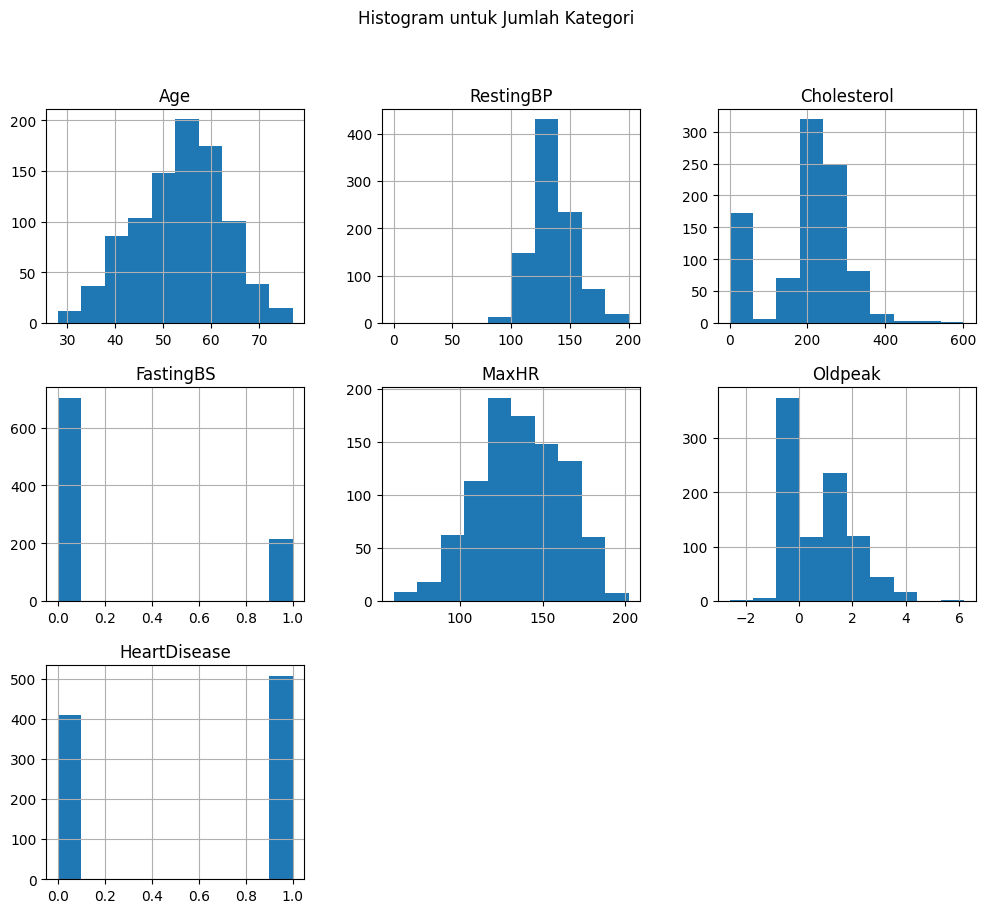

In [ ]:
#@title Plot Kategori
data.hist(figsize=(12, 10))
plt.suptitle('Histogram untuk Jumlah Kategori')
plt.show()

---

## Pra-pemrosesan

In [ ]:
#@title Mengkonversi Data Kategorikal ke Numerik
sex=LabelEncoder()
cpt=LabelEncoder()
recg=LabelEncoder()
ea=LabelEncoder()
st=LabelEncoder()

In [ ]:
#@title Melakukan Fit dan Transform
data['Sex']=sex.fit_transform(data['Sex'])
data['ChestPainType']=cpt.fit_transform(data['ChestPainType'])
data['RestingECG']=recg.fit_transform(data['RestingECG'])
data['ExerciseAngina']=ea.fit_transform(data['ExerciseAngina'])
data['ST_Slope']=st.fit_transform(data['ST_Slope'])

In [ ]:
#@title Sesudah Konversi
data.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0


---

<Axes: >

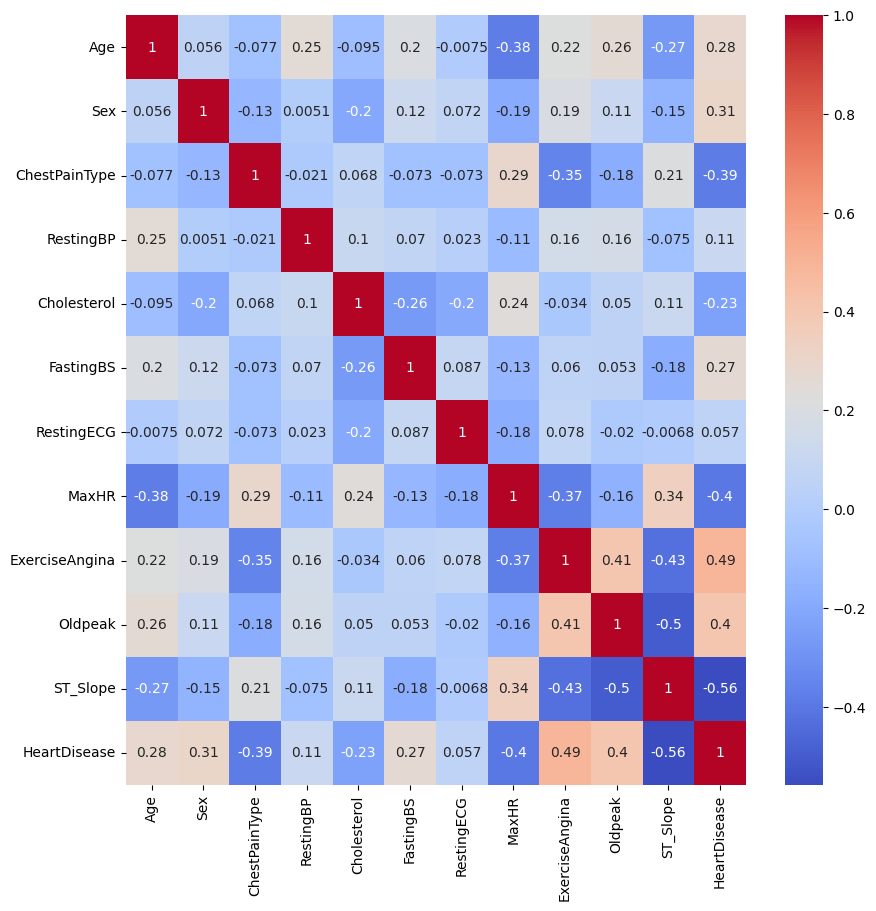

In [ ]:
#@title Analisis Korelasi
corr_matrix=data.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

---

In [ ]:
#@title Memilih Fitur (Variabel)
thresh_hold=0.2
select_feat=corr_matrix.index[abs(corr_matrix['HeartDisease'])>=thresh_hold].to_list()
select_feat.remove('HeartDisease')
print(select_feat)

['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


Fungsi ini bertujuan untuk memilih fitur (variabel) yang memiliki korelasi absolut dengan variabel target 'HeartDisease' di atas ambang batas tertentu, yang dalam hal ini adalah 0.2

---


In [ ]:
#@title Menampilkan Fitur Terseleksi
fitur_terseleksi=data[select_feat]
fitur_terseleksi.head(7)

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,289,0,172,0,0.0,2
1,49,0,2,180,0,156,0,1.0,1
2,37,1,1,283,0,98,0,0.0,2
3,48,0,0,214,0,108,1,1.5,1
4,54,1,2,195,0,122,0,0.0,2
5,39,1,2,339,0,170,0,0.0,2
6,45,0,1,237,0,170,0,0.0,2


---

In [ ]:
#@title Menormalkan Fitur yang Dipilih
scaler=StandardScaler()
fitur_terseleksi=scaler.fit_transform(fitur_terseleksi)
fitur_terseleksi

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

Tujuannya untuk menyeimbangkan fitur yang telah dibuat. Menstandarisasi data (mengatur agar rata-rata setiap fitur menjadi 0 dan standar deviasi menjadi 1). Skala masing-masing variabel jadi sama dan tidak ada yang lebih besar atau kecil.


---

## Data-Splitting

In [ ]:
#@title Membagi Data Train dan Test
x=fitur_terseleksi
y=data['HeartDisease']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

---

## Model Regresi Linear

In [ ]:
#@title Membangun Model Regresi Linear
from sklearn.linear_model import LinearRegression
modellin=LinearRegression()
modellin.fit(x_train,y_train)

LinearRegression()

In [ ]:
#@title Melakukan Pengujian Model
y_pred=modellin.predict(x_test)

In [ ]:
#@title Melakukan Uji Linearitas
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
print("Nilai R-squared:", r_value**2)

Nilai R-squared: 0.48641406742709486


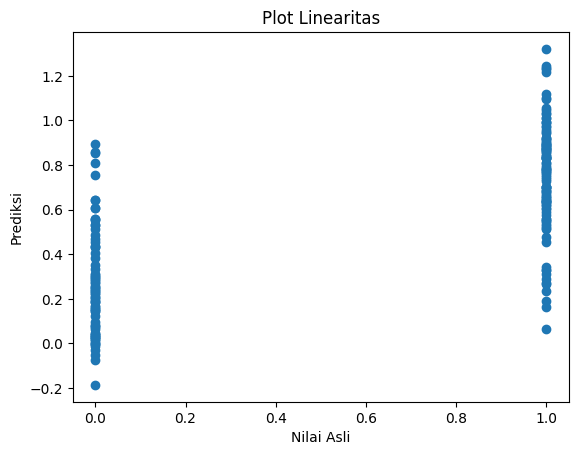

In [ ]:
#@title Plot Linearitas
plt.scatter(y_test, y_pred)
plt.xlabel('Nilai Asli')
plt.ylabel('Prediksi')
plt.title('Plot Linearitas')
plt.show()

Text(0, 0.5, 'Residual')

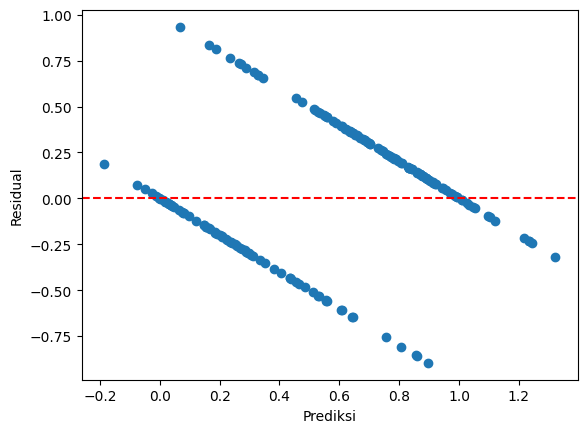

In [ ]:
#@title Analisis Residual
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prediksi')
plt.ylabel('Residual')

***Dari uji linearitas diatas menunjukan bahwa nilai r-square yang kecil artinya linearitasnya kurang. Bentuk plot yang tidak menunjukan linearitas. Data yang di gunakan adalah data non-linear dan akan dicoba menggunakan model lain seperti Regresi Logistik, SVM, dan Decision Tree***

---

## Model Regresi Logistik

In [ ]:
#@title Membangun Model Regresi Logistik
from sklearn.linear_model import LogisticRegression
modellog=LogisticRegression()
modellog.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#@title Melakukan Pengujian Model
y_predlog=modellog.predict(x_test)

In [ ]:
#@title Persentase Pengetesan
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predlog))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.86      0.89      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



0: Test,
1: Train


***Performa Klasifikasi:***
Model ini memiliki akurasi keseluruhan 85%, yang menunjukkan bahwa 85% dari prediksi model ini adalah benar.
Precision dan recall untuk kedua kelas (0 dan 1) cukup tinggi, dengan nilai precision 0.84 untuk kelas 0 dan 0.86 untuk kelas 1, serta nilai recall 0.79 untuk kelas 0 dan 0.89 untuk kelas 1.

***Keseimbangan Kinerja:***
F1-score untuk kelas 0 adalah 0.81 dan untuk kelas 1 adalah 0.87, menunjukkan bahwa model ini seimbang dalam hal precision dan recall untuk kedua kelas.
Rata-rata makro (macro avg) dari precision, recall, dan f1-score masing-masing adalah 0.85, 0.84, dan 0.84, mengindikasikan bahwa model ini memiliki performa yang konsisten di kedua kelas tanpa memperhitungkan distribusi kelas.

***Relevansi dan Support:***
Kelas 0 memiliki 77 sampel dan kelas 1 memiliki 107 sampel dalam data uji. Ini menunjukkan bahwa meskipun ada ketidakseimbangan jumlah sampel antara kedua kelas, model ini tetap mampu memberikan performa yang baik.

***Rata-rata Berbobot (Weighted Avg):***
Rata-rata berbobot dari precision, recall, dan f1-score masing-masing adalah 0.85, menunjukkan bahwa ketika memperhitungkan proporsi sampel dari kedua kelas, model ini memiliki kinerja yang baik secara keseluruhan.

**Kesimpulan Umum:**
Model klasifikasi biner ini menunjukkan kinerja yang baik dengan akurasi 85%. Precision dan recall yang tinggi untuk kedua kelas menunjukkan bahwa model ini mampu melakukan klasifikasi dengan akurat dan andal. Keseimbangan antara precision dan recall, yang ditunjukkan oleh f1-score, menunjukkan bahwa model ini tidak bias terhadap salah satu metrik tersebut. Dengan demikian, model ini dapat digunakan dengan percaya diri untuk tugas klasifikasi yang serupa.

---

In [ ]:
#@title Evaluasi Model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_predlog)
print("Akurasi Model Regresi Logistik=",int(accuracy*100),'%')

Akurasi Model Regresi Logistik= 84 %


In [ ]:
#@title Menghitung Probabilitas Penyakit Jantung
y_pred_prob = modellog.predict_proba(x_test)
y_pred_prob

array([[0.08433521, 0.91566479],
       [0.33773937, 0.66226063],
       [0.0549943 , 0.9450057 ],
       [0.08860885, 0.91139115],
       [0.80921585, 0.19078415],
       [0.84982311, 0.15017689],
       [0.95548051, 0.04451949],
       [0.97655261, 0.02344739],
       [0.91018201, 0.08981799],
       [0.87387468, 0.12612532],
       [0.08964121, 0.91035879],
       [0.05649975, 0.94350025],
       [0.05142412, 0.94857588],
       [0.08782268, 0.91217732],
       [0.79840805, 0.20159195],
       [0.04082632, 0.95917368],
       [0.00534136, 0.99465864],
       [0.12917998, 0.87082002],
       [0.00489664, 0.99510336],
       [0.78114962, 0.21885038],
       [0.12483817, 0.87516183],
       [0.05951512, 0.94048488],
       [0.17736649, 0.82263351],
       [0.07215662, 0.92784338],
       [0.96856468, 0.03143532],
       [0.96309344, 0.03690656],
       [0.0693886 , 0.9306114 ],
       [0.02600935, 0.97399065],
       [0.07950585, 0.92049415],
       [0.50072195, 0.49927805],
       [0.

In [ ]:
#@title Rata-rata Probabilitas
y_pred_prob.mean()

0.5

***Dari penggunaan model regresi logistik, ditemukan bahwa ditemukan akurasi sebesar 84% yang artinya kemungkinan cocoknya besar. Rata-rata probabilitas menunjukan kemungkinan penyakit jantung terjadi adalah 50%***

---

## Model SVM


In [ ]:
#@title Membangun Model SVM
from sklearn.svm import SVC
modelsvm=SVC()
modelsvm.fit(x_train,y_train)

SVC()

In [ ]:
#@title Melakukan Pengujian Model
y_predsvm=modelsvm.predict(x_test)

In [ ]:
#@title Melakukan Klasifikasi Dengan SVM
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        77
           1       0.85      0.90      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



In [ ]:
#@title Evalusi Model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_predsvm)
print("Akurasi Model SVM=",int(accuracy*100),'%')

Akurasi Model SVM= 84 %


***Dari penggunaan model SVM, ditemukan bahwa ditemukan akurasi sebesar 84% yang artinya kemungkinan cocoknya besar.***

---

## Model Decision Tree (Pohon Keputusan)

In [ ]:
#@title Membangun Model Decision Tree
from sklearn.tree import DecisionTreeClassifier
modeldtc=DecisionTreeClassifier()
modeldtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#@title Melakukan Pengujian Model
y_preddtc=modeldtc.predict(x_test)

In [ ]:
#@title Evaluasi Model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_preddtc)
print("Akurasi Model Decision Tree=",int(accuracy*100),'%')

Akurasi Model Decision Tree= 73 %


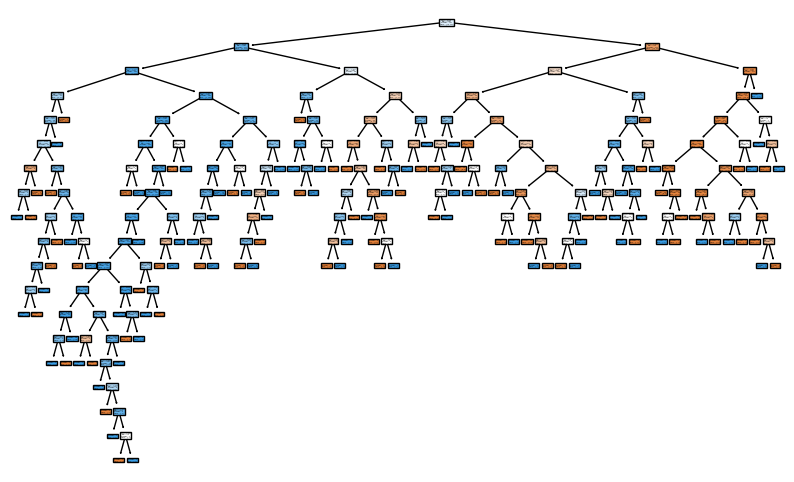

In [ ]:
#@title Plot Decision Tree Kecil
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(modeldtc, filled=True)
plt.show()

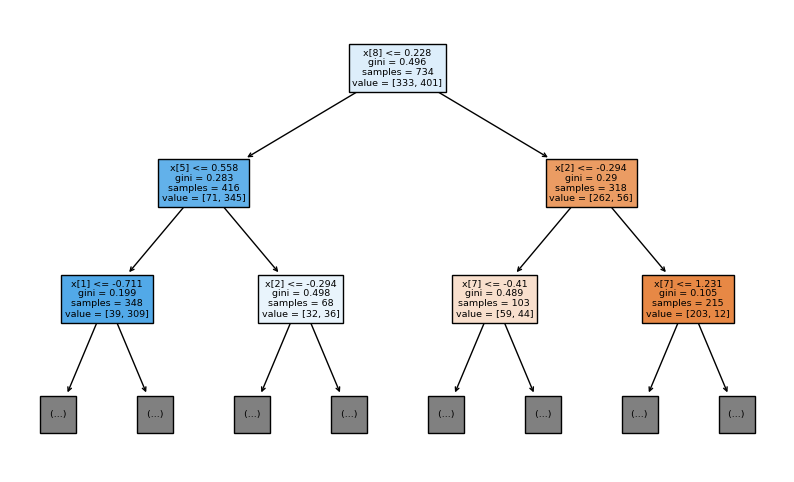

In [ ]:
#@title Mengurangi Plot Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(modeldtc, filled=True, max_depth=2)
plt.show()

***Nilai 72% dari model ini tidak terlalu buruk namun tidak terlalu kuat juga. Jadi bisa ganti model lain.***

---

## ***Kesimpulan Prediksi Gagal Jantung***

### Model Regresi Linear

Nilai R-squared: 0.486, menunjukkan bahwa model ini kurang baik dalam menjelaskan variabilitas data karena hubungan yang tidak linear.

---

### Model Regresi Logistik

Akurasi: 84%, menunjukkan bahwa model ini memiliki tingkat kecocokan yang tinggi dalam memprediksi gagal jantung.

---

### Model SVM (Support Vector Machine)

Akurasi: 84%, mirip dengan regresi logistik, model ini juga menunjukkan tingkat kecocokan yang tinggi.

---

### Model Decision Tree (Pohon Keputusan)

Akurasi: 72%, lebih rendah dibandingkan dengan model regresi logistik dan SVM.

---

### Kesimpulan
Model yang paling akurat dalam memprediksi gagal jantung adalah Regresi Logistik dan SVM, keduanya dengan akurasi sebesar 84%. Sedangkan model Decision Tree menunjukkan akurasi yang lebih rendah, yaitu 72%.

---

### ***Pada saat menggunakan model regresi logistik didapatkan rata-rata kemungkinan orang terkena penyakit jantung sesuai data yang digunakan adalah 50%***